In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data taken from [Kaggle Digit Recognizer Competition](https://www.kaggle.com/c/digit-recognizer)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(f"Training data has {train.isna().sum().sum()} missing values")
print(f"Testing data has {test.isna().sum().sum()} missing values")

Training data has 0 missing values
Testing data has 0 missing values


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='label', ylabel='count'>

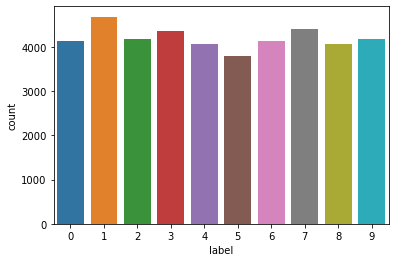

In [6]:
sns.countplot(x = train["label"])

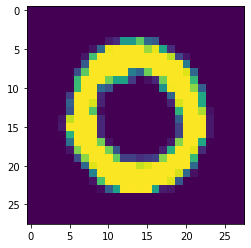

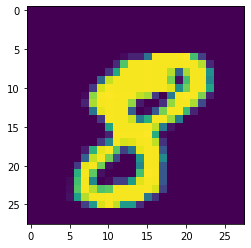

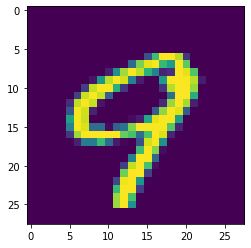

In [7]:
for i in [1, 10, 100]:
    plt.imshow(train.iloc[i][1:].values.reshape(28, 28))
    plt.show()

In [8]:
X_train = train.drop("label", axis = 1)
y = train["label"]

In [9]:
X_train = X_train / 255
X_test = test / 255

In [10]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [11]:
X_train.shape

(42000, 28, 28, 1)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [13]:
y_train = to_categorical(y)

In [14]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [15]:
model = keras.Sequential([
    layers.InputLayer([28,28,1]),
    
    preprocessing.RandomTranslation(height_factor = 0.1, width_factor = 0.1),
    
    layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu", padding = "same"),
    layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu", padding = "same"),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(rate = 0.2),
    layers.Dense(10, activation = "softmax")
])

In [16]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])

In [17]:
history = model.fit(X_train, y_train, validation_split = 0.2, batch_size = 64, epochs = 100)

Epoch 1/100
525/525 [==============================] - 8s 8ms/step - loss: 0.3878 - categorical_accuracy: 0.8755 - val_loss: 0.1397 - val_categorical_accuracy: 0.9519
Epoch 2/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0701 - categorical_accuracy: 0.9786 - val_loss: 0.0710 - val_categorical_accuracy: 0.9777
Epoch 3/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0536 - categorical_accuracy: 0.9832 - val_loss: 0.1044 - val_categorical_accuracy: 0.9679
Epoch 4/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0435 - categorical_accuracy: 0.9867 - val_loss: 0.0427 - val_categorical_accuracy: 0.9862
Epoch 5/100
525/525 [==============================] - 3s 6ms/step - loss: 0.0436 - categorical_accuracy: 0.9874 - val_loss: 0.0361 - val_categorical_accuracy: 0.9893
Epoch 6/100
525/525 [==============================] - 3s 5ms/step - loss: 0.0367 - categorical_accuracy: 0.9884 - val_loss: 0.0381 - val_categorical_accuracy: 0.988

In [18]:
history_df = pd.DataFrame(history.history)
history_df

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,0.182101,0.942560,0.139747,0.951905
1,0.067487,0.979821,0.071029,0.977738
2,0.055255,0.982440,0.104398,0.967857
3,0.044307,0.986756,0.042663,0.986190
4,0.043789,0.986607,0.036051,0.989286
...,...,...,...,...
95,0.003283,0.998810,0.053447,0.993452
96,0.005227,0.998393,0.049181,0.993095
97,0.005742,0.998720,0.067725,0.991548
98,0.004950,0.998512,0.055353,0.993333


<AxesSubplot:>

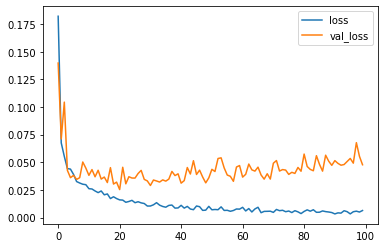

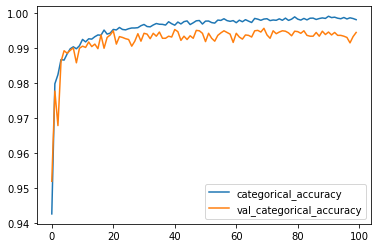

In [19]:
history_df.loc[:, ["loss", "val_loss"]].plot()
history_df.loc[:, ["categorical_accuracy", "val_categorical_accuracy"]].plot()

In [20]:
results = np.argmax(model.predict(X_test), axis = -1)
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [21]:
X_test.shape

(28000, 28, 28, 1)

In [22]:
submission = pd.DataFrame({"ImageId": range(1, 28001), "Label": results})
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [23]:
submission.to_csv("submission.csv")